#**PROYECTO FINAL**

#**Entrenamiento y optimización de modelos de machine learning**
> Nombre del Dataset: Dataset-Telco-Customer-Churn.csv

> Realizado por: Carlos Parra para CoderHouse.

##**Abstracto / Objetivo**
>Este análisis se centra en el comportamiento de los clientes de telecomunicaciones que tienen más probabilidades de abandonar la empresa. La idea es descubrir el comportamiento de los clientes a través del análisis exploratorio de datos (EDA) y luego utilizar modelos de Machine Learning para determinar cuáles son los clientes que tienen más probabilidades de abandonar resolviendo así el problema de esta.

>Esta investigación está dirigida a los responsables de la toma de decisiones del área comercial de la empresa de Telecomunicaciones, en virtud de la perdida de suscriptores activos en los últimos meses.

##**Contexto Comercial**
> La empresa "Telecomunicaciones" esta observando con mucho énfasis la creciente subida en la tasa de abandono de sus suscriptores, por ello se desea determinar cuales son las causas que han incidido en este aumento. Para esto se ha disponibilizado la información de sus suscriptores con sus características más relevantes y se ha instruido al equipo de data science que construya un modelo que permita identificar las causas principales de dicha bajas y así poder tomar las acciones correctivas para reducirla.

##**Problema Comercial**

> Para solucionar que problema planteado en la sección anterior se debe manipular el dataset, proporcionando análisis estadísticos, numéricos y las correspondientes visualizaciones para dar respuesta a lo descrito en el apartado de "Preguntas/hipótesis" expuesto más adelante.

##**Contexto analítico**
> Se proporcionó un dataset llamado "Dataset-Telco-Customer-Churn.csv", delimitando los campos con el caracter coma ",", que se alojó en una carpeta de Google Drive llamada "Proyecto Data Science" que contiene las caracterisitca de los suscriptores de la empresa.

##**Preguntas a responder:**

>*	Determinar si la cantidad y el tipo de servicios contratados influye en la retencion del cliente.
* Determinar como se correlacionan las distintas variables del estudio con la duracion de los contratos y la retención.
* Predecir a través de un modelo si el cliente va a abandonar el servicio o no y cuales son las variables que mas influyen en la predicción.
* ¿Cuáles son los indicadores clave de una rotación de clientes?
* ¿Qué estrategias de retención se pueden implementar en función de los resultados para disminuir la pérdida de clientes potenciales?
*	Determinar si el aumento en los cargos incide en al tasa de abandono
* Predecir a través de un modelo si el cliente va a abandonar el servicio o no y cuales son las variables que mas influyen en la predicción.
* ¿Cuáles son los indicadores clave de la rotación de clientes?





#Preparación de los datos

In [123]:
#Instalación y carga de librerías a utilizar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#building model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data display coustomization
pd.set_option('display.max_columns', 100)

In [124]:
#Carga del dataset en formato .csv
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


In [125]:
#Mostar el Dataset Preliminar (Sin transformaciones)
display(df_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Contar valores NA por columna

In [126]:
print(df_churn.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##Preprocesamiento

In [127]:
#Eliminación de la columna del Id de cliente que no es relevante a estudio
df_churn.drop("customerID", axis=1, inplace=True)

In [128]:
#Casteo de los datos
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]
df_churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [129]:
#Busqueda y Eliminación de duplicados
print(df_churn.shape)
df_churn = df_churn.drop_duplicates()
print(df_churn.shape)

(7043, 20)
(7021, 20)


#EDA

##Detección de outliers

In [130]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

In [131]:
# Create a new DataFrame with only numeric columns
numeric_data = df_churn.select_dtypes(include=np.number)
display(numeric_data.info())
display(numeric_data.head())
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   OnlineSecurity    7021 non-null   int64  
 8   OnlineBackup      7021 non-null   int64  
 9   DeviceProtection  7021 non-null   int64  
 10  TechSupport       7021 non-null   int64  
 11  StreamingTV       7021 non-null   int64  
 12  StreamingMovies   7021 non-null   int64  
 13  PaperlessBilling  7021 non-null   int64  
 14  MonthlyCharges    7021 non-null   float64
 15  TotalCharges      7010 non-null   float64
 16  Churn             7021 non-null   int64  


None

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


##Tasa de abandono de clientes

------------------ GENDER ------------------
1    3541
0    3480
Name: gender, dtype: int64


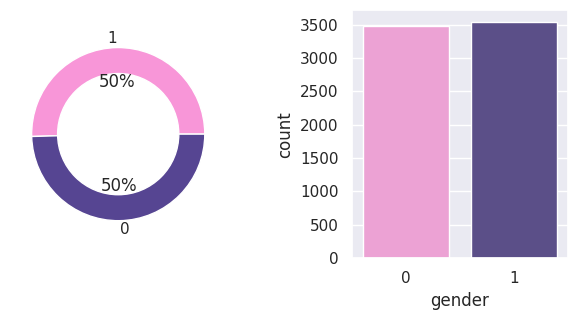

In [132]:
 Col_Analizar = "gender"
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()

Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato.

Churn
0    61.344878
1    74.604308
Name: MonthlyCharges, dtype: float64 

Churn
1    1541.376548
0    2560.264118
Name: TotalCharges, dtype: float64 



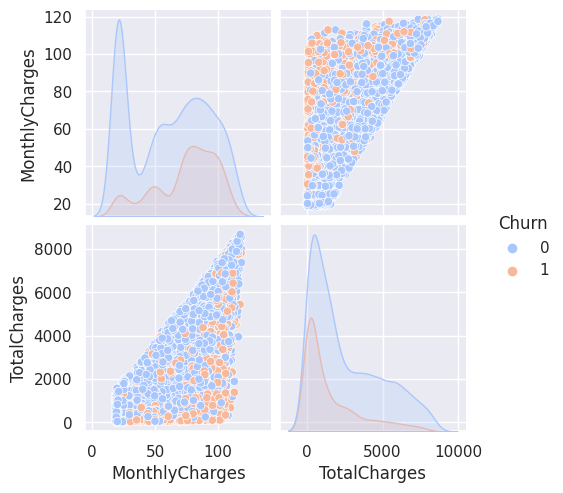

In [133]:
##Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono
print(df_churn.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')

datos_1 = ['MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df_churn[datos_1], hue = 'Churn', palette='coolwarm')

count    7021.000000
mean       32.469449
std        24.534965
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Skew:  0.23549135483276984
Kurtosis:  1.6120439849837025
IQR:  46.0


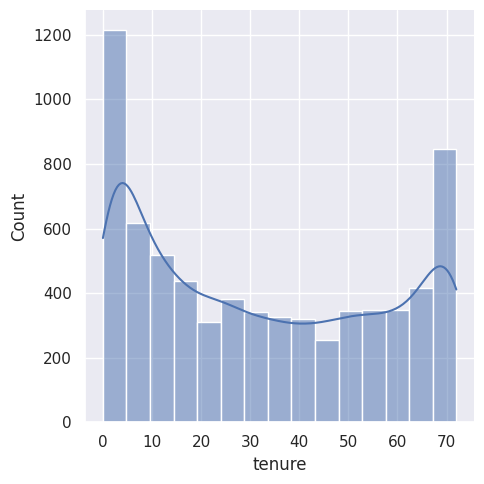

In [134]:
Col_Analizar = 'tenure'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)

In [135]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7021, minmax=(0, 72), mean=32.46944879646774, variance=601.9644867189234, skewness=0.23549135483276984, kurtosis=-1.3879560150162975)
Media geometrica:  0.0
Media armonica:  0.0
Media recortada:  31.546021007655334
Moda:  ModeResult(mode=array([1]), count=array([591]))
Coeficiente de variacion:  0.7555784950745276
IQR:  46.0


count    7021.000000
mean       64.851894
std        30.069001
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64
Skew:  -0.22404940903931683
Kurtosis:  1.7460647910547091
IQR:  54.150000000000006


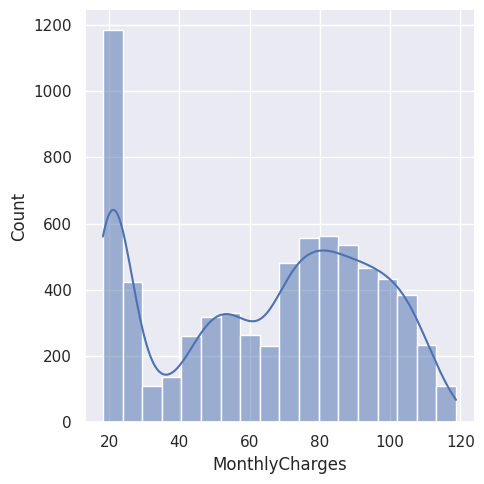

In [136]:
Col_Analizar = 'MonthlyCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    1.164135
1    0.262811
2    0.365914
3    0.750058
4    0.194503
5    1.157358
6    0.806473
7    1.167461
Name: MonthlyCharges, dtype: float64

count    7021.000000
mean        0.871232
std         0.490906
min         0.000063
25%         0.460703
50%         0.844847
75%         1.343735
max         1.792608
Name: MonthlyCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    7021.000000
mean       64.851894
std        30.069001
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

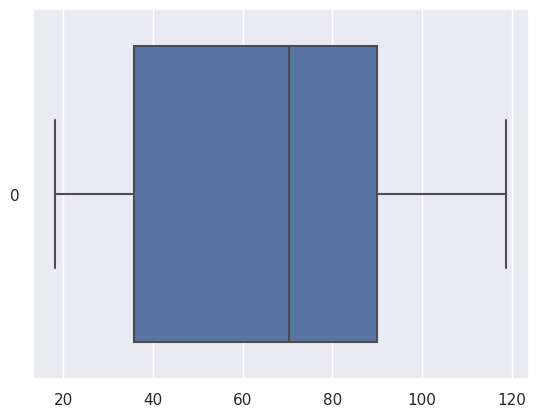

In [137]:
#Cálculo de ZScore
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [138]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7021, minmax=(18.25, 118.75), mean=64.85189431704886, variance=904.1448183483735, skewness=-0.22404940903931683, kurtosis=-1.2539352089452909)
Media geometrica:  55.91409992423914
Media armonica:  46.04519638557519
Media recortada:  65.07643760014243
Moda:  ModeResult(mode=array([20.05]), count=array([59]))
Coeficiente de variacion:  0.463623458224218
IQR:  54.150000000000006


count    7010.000000
mean     2290.353388
std      2266.820832
min        18.800000
25%       408.312500
50%      1403.875000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64
Skew:  0.9581169846913229
Kurtosis:  2.7609409418723323
IQR:  3399.525


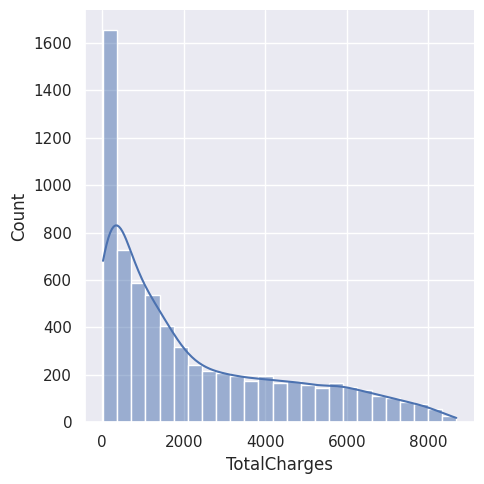

In [139]:
Col_Analizar = 'TotalCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
column = numeric_data[Col_Analizar].dropna()
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    0.997284
1    0.176848
2    0.962740
3    0.198355
4    0.943549
5    0.648467
6    0.150421
7    0.877262
Name: TotalCharges, dtype: float64

count    7010.000000
mean        0.838265
std         0.545301
min         0.000200
25%         0.462334
50%         0.802039
75%         0.987860
max         2.821089
Name: TotalCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    6620.000000
mean     1980.995884
std      1925.347198
min        18.800000
25%       365.387500
50%      1275.675000
75%      3249.662500
max      6823.400000
Name: TotalCharges, dtype: float64

<Axes: >

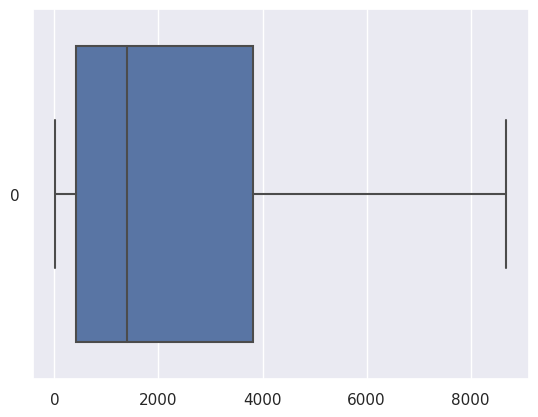

In [140]:
#Cálculo de ZScore
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [141]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)


DescribeResult(nobs=7010, minmax=(18.8, 8684.8), mean=2290.3533880171185, variance=5138476.683244691, skewness=0.9581169846913229, kurtosis=-0.2390590581276677)
Media geometrica:  1043.7118097750326
Media armonica:  259.8055894642402
Media recortada:  1978.2929654065622
Moda:  ModeResult(mode=array([19.75]), count=array([9]))
Coeficiente de variacion:  0.9896547637776886
IQR:  3399.525


###Resumen del comportamiento de las variables numericas

En general se observó que todas las variables numéricas del dataset  no tienen una distribución normal, por los que procederemos a calcular las desviaciones estandar, y la asimetría de los mismos.

* "tenure" :
  * La variable tenure indica el número de meses que un cliente ha estado suscrito al servicio. El valor mínimo es 0 (lo que indica que el cliente acaba de suscribirse) y el valor máximo es 72. La media es de 32,37 meses y la mediana es de 29 meses.
  * La mayoría de los clientes abandonan después de un tiempo relativamente corto.Existe un problema con la retención de clientes a largo plazo en la empresa.
  * Hay una gran variación en la duración de la membresía de los clientes que abandonan lo  podría indicar que hay diferentes factores que contribuyen al abandono, y que es necesario analizarlo con respecto a otras variables.
  *  En general tiene una distribución aproximadamente simétrica, con un sesgo cercano a cero y una curtosis cercana a la normalidad. Esto indica que la mayoría de los clientes tienen una duración de contrato similar, con algunas diferencias en los extremos. <br>
  * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=603.1681081237369 <br>
skewness=0.2394887299846216<br>kurtosis=-1.3872386910324277<br>
Coeficiente de variacion:  0.7586303990053388<br>
IQR:  46.0<br><br>

* "MonthlyCharges" : <br>
  * Los cargos mensuales indican que la mayoría de los clientes que abandonan tienen cargos mensuales bajos, y que los cargos más altos tienen una menor tasa, disminuyendo el abandono a partir del 3er quartil.
  * El sesgo y la curtosis de esta variable se se comporta de manera similar a la variable Tenure, lo que indica que la mayoría de los clientes tienen cargos mensuales similares, pero algunos clientes tienen cargos mensuales significativamente mas cerca de los extremos.
  * En general, se observa una tendencia de que los clientes que pagan menos  por el servicio tienen más probabilidades de cancelar. se observó que el 24.4% de los clientes que pagan más de 70 por mes cancelaron segun el boxplot.

 * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=905.4109343405098<br>
Skewness=-0.2204774644391769<br>
kurtosis=-1.2572191009381857)<br>
Coeficiente de variacion:  0.4645942641669282<br>
IQR:  54.35<br><br>

* "TotalCharges" : <br>
  * Segun la distribución de los cargos totales de los clientes que abandonan,se puede determinar que la mayoría de ellos tienen cargos totales relativamente bajos y que a medida que estos aumentan disminuye la tasa de abandono. observandose un sesgo totalmente a la derecha.

  * La media de la variable TotalCharges es de aproximadamente $2283.30, mientras que la mediana es de 1397.47. La diferencia entre la media y la mediana sugiere que hay valores atípicos en el extremo superior de la distribución.

 * RESUMEN NUMÉRICO<br>
mean     2283.300441<br>
std      2266.771362<br>
min        18.800000<br>
25%       401.450000<br>
50%      1397.475000<br>
75%      3794.737500<br>
max      8684.800000<br>
variance=5138252.407053568<br>
Skewness=0.9614373590490068<br>
kurtosis=-0.23248709758655117)<br>
Coeficiente de variacion:  0.9926902917247381<br>
IQR:  3393.2875000000004<br><br>


En conclusión Las variables numéricas tenure, MonthlyCharges y TotalCharges tienen distribuciones similares a las que se describieron anteriormente. La mayoría de los clientes tienen una duración de contrato similar, cargos mensuales similares y cargos totales similares, pero con algunas diferencias en los extremos lo que sugiere que los clientes que han estado mas antiguos en la compañía y que pagan más mensualmente tienen cargos totales más altos.

##Análisis univariado variables categoricas

------------------ GENDER ------------------
1    3541
0    3480
Name: gender, dtype: int64


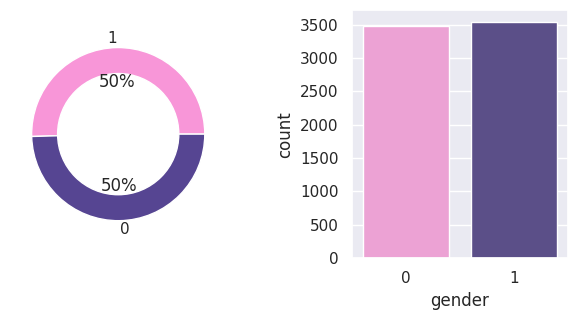

------------------ PARTNER ------------------
0    3619
1    3402
Name: Partner, dtype: int64


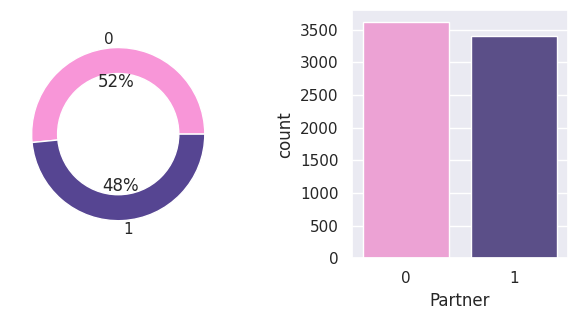

------------------ DEPENDENTS ------------------
0    4911
1    2110
Name: Dependents, dtype: int64


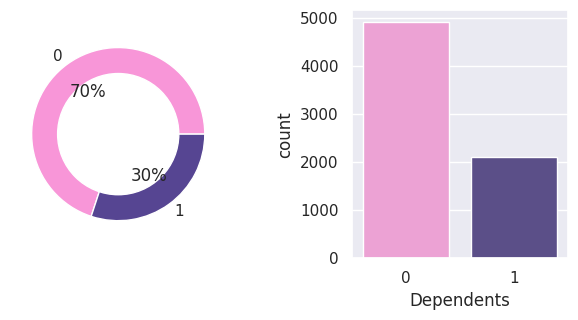

------------------ PHONESERVICE ------------------
1    6339
0     682
Name: PhoneService, dtype: int64


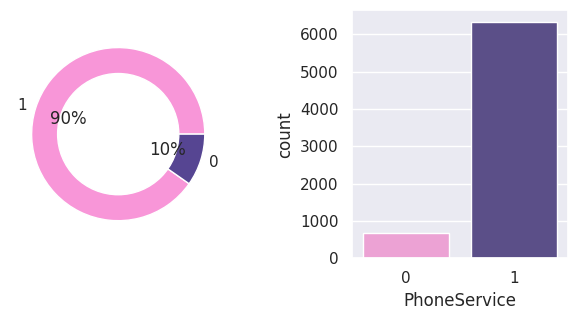

------------------ MULTIPLELINES ------------------
0    4050
1    2971
Name: MultipleLines, dtype: int64


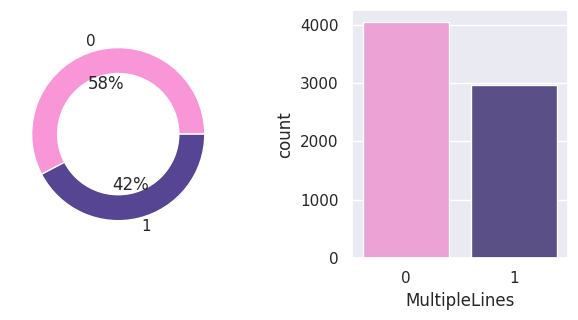

------------------ INTERNETSERVICE ------------------
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


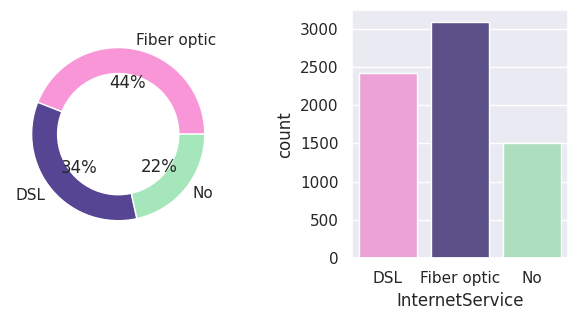

------------------ ONLINESECURITY ------------------
0    5002
1    2019
Name: OnlineSecurity, dtype: int64


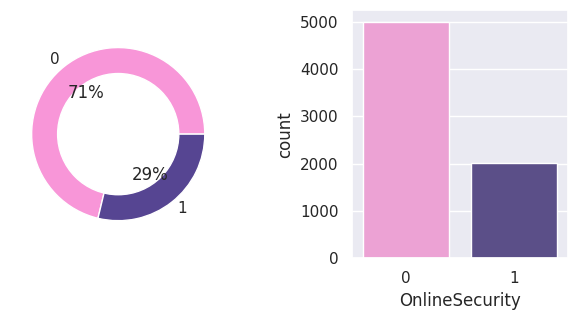

------------------ ONLINEBACKUP ------------------
0    4592
1    2429
Name: OnlineBackup, dtype: int64


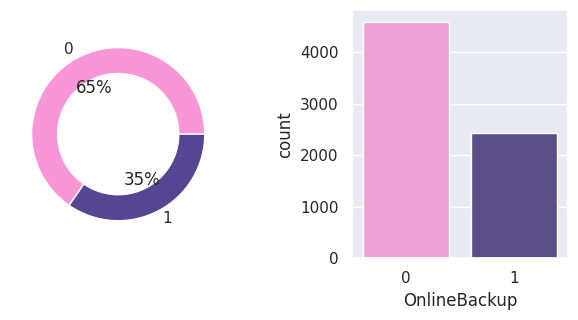

------------------ DEVICEPROTECTION ------------------
0    4599
1    2422
Name: DeviceProtection, dtype: int64


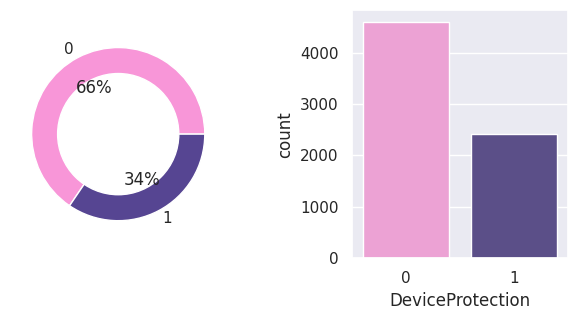

------------------ TECHSUPPORT ------------------
0    4977
1    2044
Name: TechSupport, dtype: int64


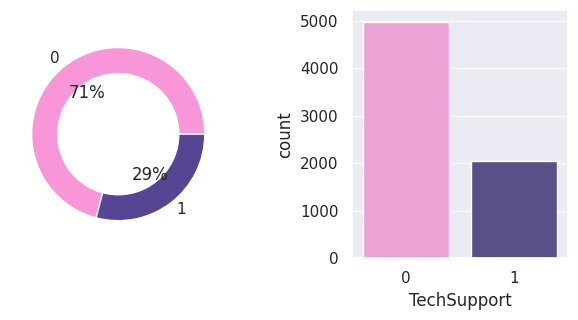

------------------ PAYMENTMETHOD ------------------
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


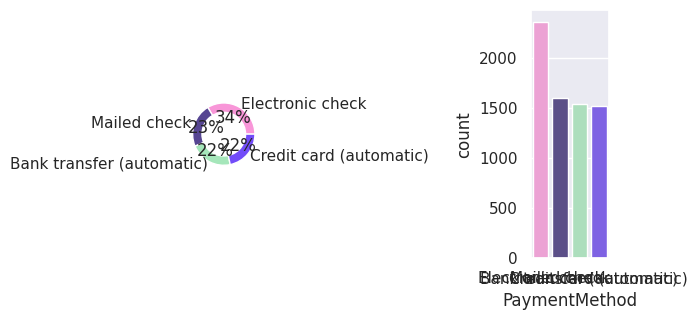

------------------ PAPERLESSBILLING ------------------
1    4161
0    2860
Name: PaperlessBilling, dtype: int64


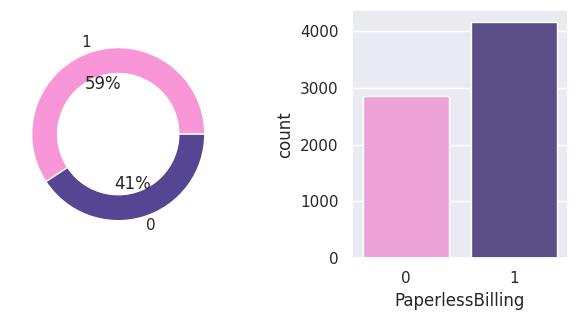

------------------ CONTRACT ------------------
Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


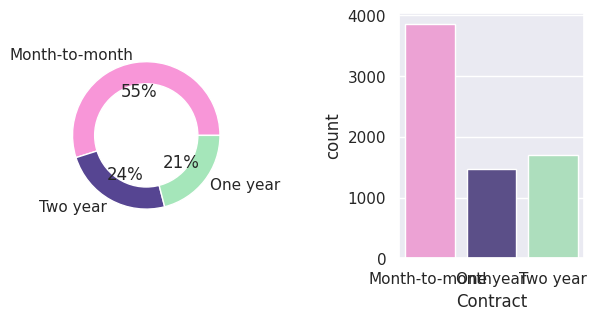

------------------ STREAMINGMOVIES ------------------
0    4289
1    2732
Name: StreamingMovies, dtype: int64


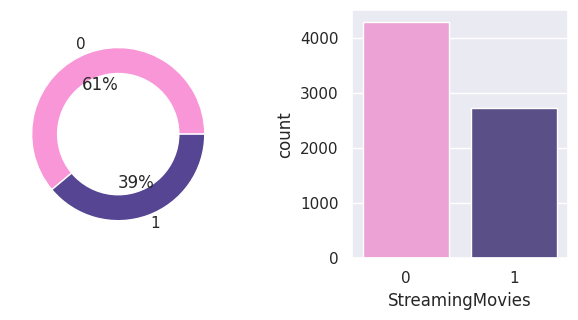

------------------ STREAMINGTV ------------------
0    4314
1    2707
Name: StreamingTV, dtype: int64


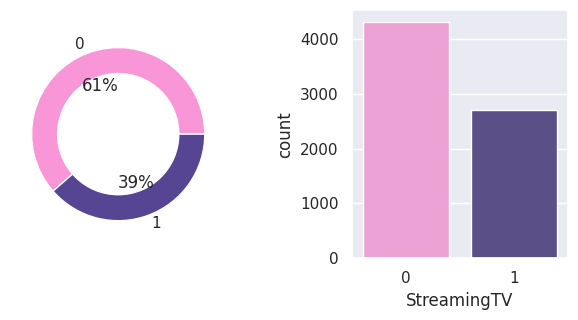

In [142]:
col_categoricas = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "PaymentMethod", "PaperlessBilling", "Contract", "StreamingMovies", "StreamingTV"]
for i, columna in enumerate(col_categoricas):
 Col_Analizar = columna
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()


In [143]:
telecom = df_Original #reseteo del dataframe


###Resumen del comportamiento de las variables categoricas

* "gender" : Al analizar  la columna genero observamos que estan distribuidas uniformemente.

* "Partner" : con respecto a esta columna observamos que ligeramente es mayor la opcion "No".

* "Dependents" : Para los clientes que tienen dependientes observamos que el 70% no ha abandonado o cancelado contrato.

* "PhoneService" : En su mayoria los clientes que contratan tambien contratan servicio telefonico.

* "MultipleLines" : de los abonados totales la mayoría no tiene multiples lineas.

* "InternetService" : En su mayoria el servicio de internet es por fibra óptica.

* "OnlineSecurity" : La mitad de los clientes no contratan este serivicio.

* "OnlineBackup" : El 44% de los clientes no contrata este servicio.

* "DeviceProtection" : Igual al anterior.

* "TechSupport" : Alrededor de un 30% contrata este servicio.

* "PaymentMethod" : 34% de los clientes prefiere pago electronico

* "PaperlessBilling" : La mayoria prefiere cobro sin papel.

* "Contract" : El contrato mes a mes es el predominante.

* "StreamingMovies" y "StreamingTV" : Al rededor de 6 de cada 10 clientes no contratan servicios de streaming.


##Conversion de Variables

In [144]:
#Conversión de variables binarias (Sí/No) en (1/ 0)
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

bin_var =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

telecom[bin_var] = telecom[bin_var].apply(binary_map)

#Conversión de variable binaria género (masculino/femenino) en (1/ 0)
#Crear dummies para el género y eliminar la primera columna porque una sola columna puede capturar todos los datos
gender = pd.get_dummies(telecom['gender'], drop_first=True)

# Fusionando los resultados anteriores con el dataframe
telecom = pd.concat([telecom, gender], axis=1)


#Conversión de variables multinomiales mediante la creación de variables dummies
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'InternetService']], drop_first=True)

# Agregar los resultados al dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

#Creando variables dummies para las variables categóricas restantes

ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom,ml1], axis=1)


os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom,os1], axis=1)


ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom,ob1], axis=1)

dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom,dp1], axis=1)

ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom,ts1], axis=1)

st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom,st1], axis=1)

ssm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
ssm1 = ssm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom,ssm1], axis=1)


telecom.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


##Eliminar variables repetidas (convertidas)

In [145]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

#La variable TotalCharges es del tipo de datos String, por lo que se convierte en tipo flotante
telecom['TotalCharges'] = pd.to_numeric(telecom["TotalCharges"].replace(" ",""),downcast="float")

#Comprobando los tipos de datos de las variables
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float32
 9   Churn                                  7043 non-null   int64  
 10  Male                                   7043 non-null   uint8  
 11  Cont

##Comprobando Outliers

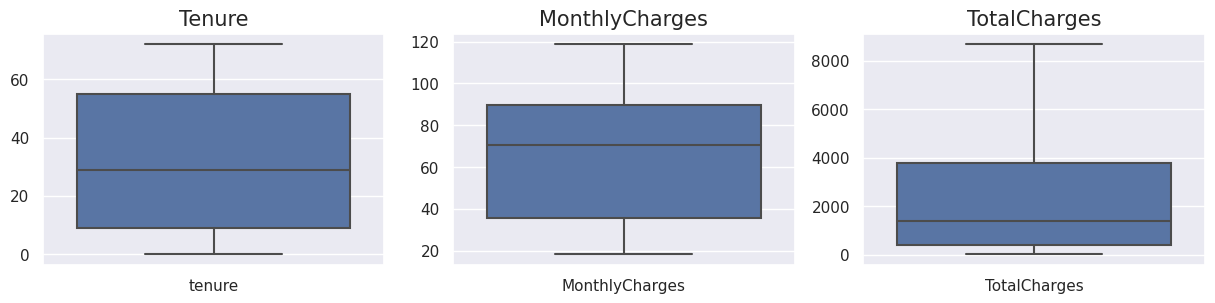

In [146]:
#Mostrar Box Plot para todas las variables continuas
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(telecom[["tenure"]])
plt.title("Tenure",size=15)

plt.subplot(1,3,2)
sns.boxplot(telecom[["MonthlyCharges"]])
plt.title("MonthlyCharges",size=15)

plt.subplot(1,3,3)
sns.boxplot(telecom[["TotalCharges"]])
plt.title("TotalCharges",size=15)

#Eliminación de filas de NaN TotalCharges
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

##Matriz de correlación

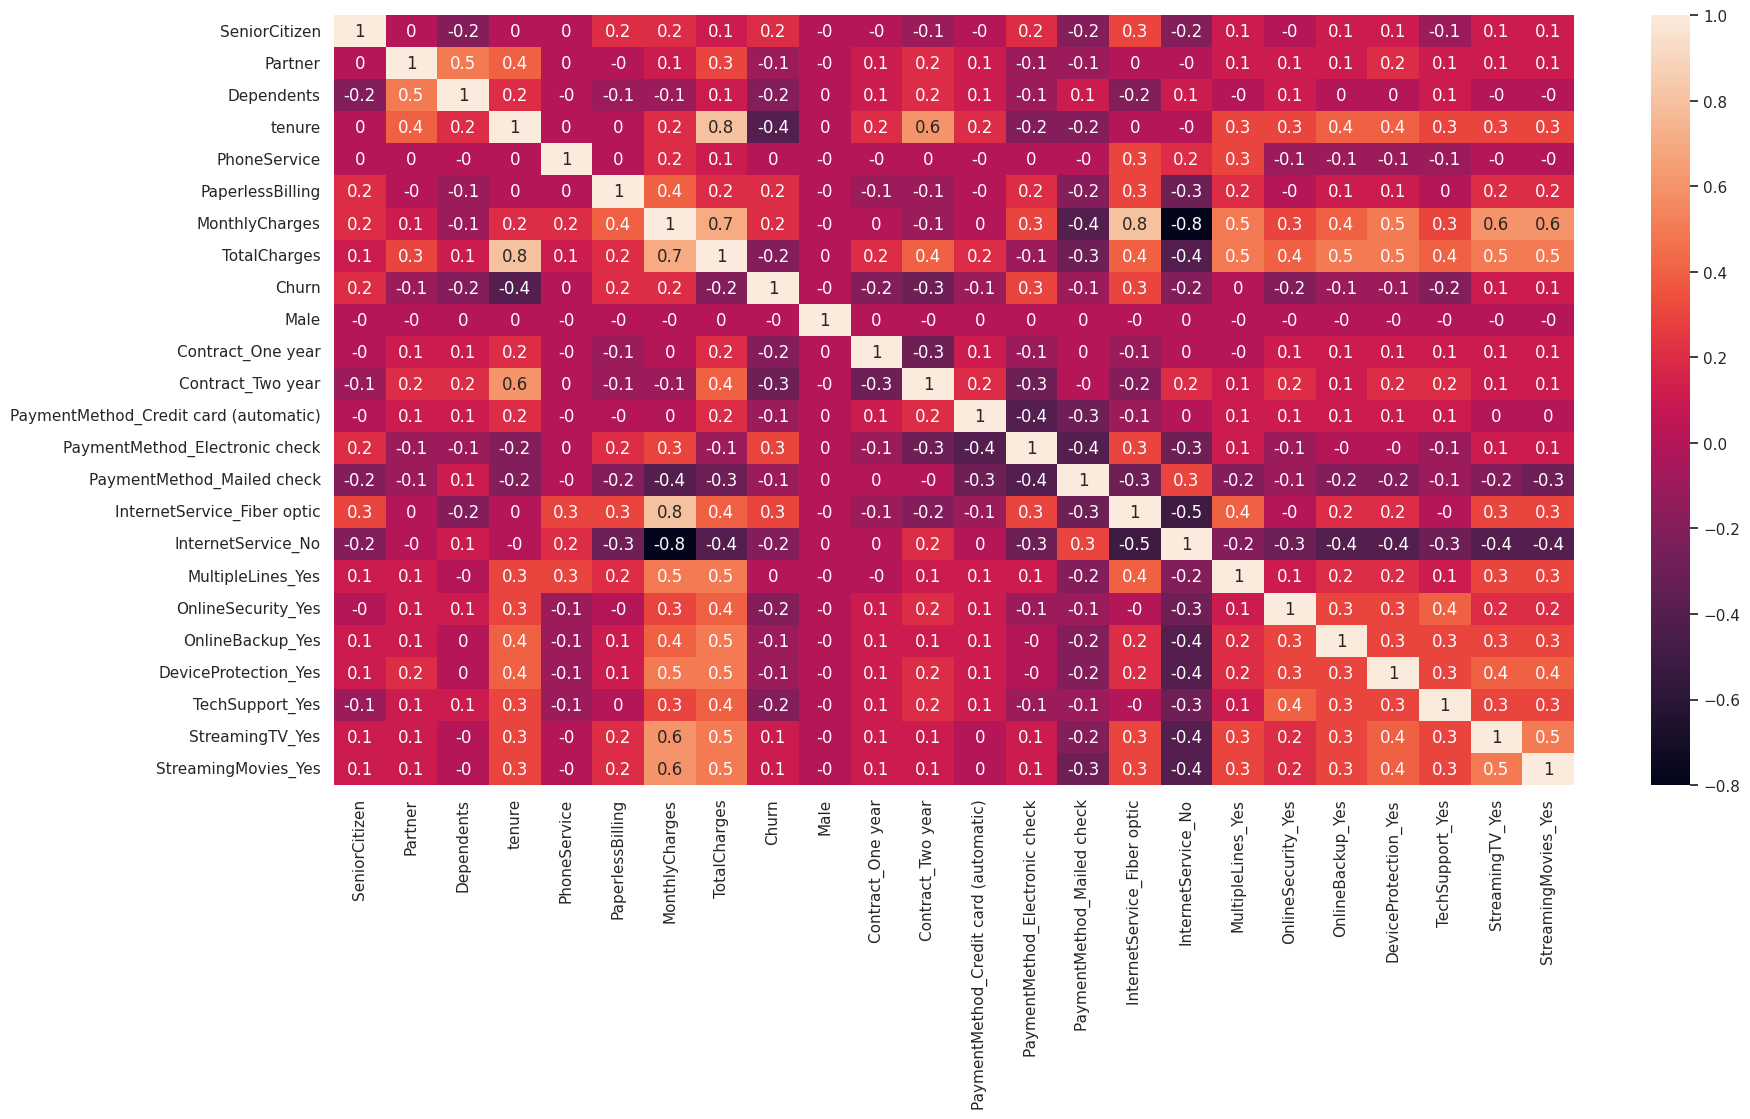

In [147]:
#eliminando las variables altamente correlacionadas
telecom.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)
# Matriz de correlación
plt.figure(figsize = (20,10))
sns.heatmap(round(telecom.corr(),1),annot = True)
plt.show()

#ALGORITMOS DE CLASIFICACIÓN

In [148]:
#Eliminar customerID
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.850000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.500000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.85,108.150002,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.750000,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0
4,0,0,0,2,1,1,70.70,151.649994,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [149]:
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [151]:
sc = StandardScaler()
sc.fit(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1


In [152]:
#Eliminar la columna customerID, y la columna target 'Churn'
X = telecom.drop(['Churn','customerID','TotalCharges'], axis=1)
#Dividir los datos en conjuntos de entrenamiento y prueba
display(X.head())
y = telecom['Churn']
display(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,34,1,0,56.95,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.85,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0,0,0,45,0,0,42.30,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0
4,0,0,0,2,1,1,70.70,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [153]:
#  Regressión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predecir con LR en el conjunto de prueba
y_pred_lr = lr.predict(X_test)

# Applicando K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir con KNN en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Applicando Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)

# Predecir con DT en el conjunto de prueba
y_pred_dt = dt.predict(X_test)

# Applicando Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

# Predecir con SVC en el conjunto de prueba
y_pred_svc = svc.predict(X_test)

# Applicando Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predecir con LDA en el conjunto de prueba
y_pred_lda = lda.predict(X_test)

# Applicando Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predecir con NB en el conjunto de prueba
y_pred_nb = nb.predict(X_test)


In [154]:

print("*** R E P O R T E S   D E   C L A S I F I C A C I Ó N ***")
print("_______________________________________________________")
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("_______________________________________________________")
print("Classification report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
print("_______________________________________________________")
print("Classification report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("_______________________________________________________")
print("Classification report for Support Vector Machines:\n", classification_report(y_test, y_pred_svc))
print("_______________________________________________________")
print("Classification report for Linear Discriminant Analysis:\n", classification_report(y_test, y_pred_lda))
print("_______________________________________________________")
print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

*** R E P O R T E S   D E   C L A S I F I C A C I Ó N ***
_______________________________________________________
Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

_______________________________________________________
Classification report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1033
           1       0.55      0.50      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.75      1407

_______________________________________________________
Classification report fo

#CROSSVALIDATION Y MEJORA DE MODELOS DE ML

In [155]:
from sklearn.metrics import accuracy_score, classification_report
r11=("* * * * * * * * * METRICAS DE LOS ALGORITMOS ORIGINALES * * * * * * * * *\n")
r12=("Accuracy para arbol de decición:\n", accuracy_score(y_test, y_pred_dt))
r13=("Accuracy para Regresión Logistica:\n", accuracy_score(y_test, y_pred_lr))
r14=("Accuracy para K-Nearest Neighbors:\n", accuracy_score(y_test, y_pred_knn))
r15=("Accuracy para  Support Vector Machines:\n", accuracy_score(y_test, y_pred_svc))
r16=("Accuracy para  Linear Discriminant Analysis:\n", accuracy_score(y_test, y_pred_lda))
r17=("Accuracy para Naive Bayes:\n", accuracy_score(y_test, y_pred_nb))
print(r11,r12,r13,r14,r15,r16,r17,sep='\n')

* * * * * * * * * METRICAS DE LOS ALGORITMOS ORIGINALES * * * * * * * * *

('Accuracy para arbol de decición:\n', 0.7341862117981521)
('Accuracy para Regresión Logistica:\n', 0.7924662402274343)
('Accuracy para K-Nearest Neighbors:\n', 0.7583511016346838)
('Accuracy para  Support Vector Machines:\n', 0.7846481876332623)
('Accuracy para  Linear Discriminant Analysis:\n', 0.7889125799573561)
('Accuracy para Naive Bayes:\n', 0.736318407960199)


In [156]:
#Mejorando el Arbol de decisión
r20=('* * * Mejorando el Arbol de decisión incrementando la complejidad del modelo - Ajuste manual -* * *\n')
from sklearn.preprocessing import PolynomialFeatures
r21=('Accuracy para arbol de decición Original con max_depth = 1 : ', accuracy_score(y_test, y_pred_dt))
# Increase model complexity
dt_md2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_md2.fit(X_train, y_train)
y_pred = dt_md2.predict(X_test)
r22=('Accuracy para arbol de decición aumentado  a max_depth = 2 : ', accuracy_score(y_test, y_pred))
dt_md3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_md3.fit(X_train, y_train)
y_pred = dt_md3.predict(X_test)
r23=('Accuracy para arbol de decición aumentado  a max_depth = 3 : ', accuracy_score(y_test, y_pred))
dt_md3 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_md3.fit(X_train, y_train)
y_pred = dt_md3.predict(X_test)
r24=('Accuracy para arbol de decición aumentado  a max_depth = 4 : ', accuracy_score(y_test, y_pred))
dt_md3 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_md3.fit(X_train, y_train)
y_pred = dt_md3.predict(X_test)
r25=('Accuracy para arbol de decición aumentado  a max_depth = 5 : ', accuracy_score(y_test, y_pred))
dt_md3 = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_md3.fit(X_train, y_train)
y_pred = dt_md3.predict(X_test)
r26=('Accuracy para arbol de decición aumentado  a max_depth = 6 : ', accuracy_score(y_test, y_pred))
dt_md3 = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_md3.fit(X_train, y_train)
y_pred = dt_md3.predict(X_test)
r27=('Accuracy para arbol de decición aumentado  a max_depth = 7 : ', accuracy_score(y_test, y_pred))
dt_md_none = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_md_none.fit(X_train, y_train)
y_pred = dt_md_none.predict(X_test)
r28=('Accuracy para arbol de decición aumentado  a max_depth=None: ', accuracy_score(y_test, y_pred))

# Perform feature engineering (create interaction features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the classifier with the new features
dt_md2.fit(X_train_poly, y_train)
y_pred_poly = dt_md2.predict(X_test_poly)
r29=('Accuracy despues de aplicar feature engineering:', accuracy_score(y_test, y_pred_poly))


print(r20,r21,r22,r23,r24,r25,r26,r27,r28,sep='\n')
print("_______________________________________________________")
print(r29,sep='\n')

* * * Mejorando el Arbol de decisión incrementando la complejidad del modelo - Ajuste manual -* * *

('Accuracy para arbol de decición Original con max_depth = 1 : ', 0.7341862117981521)
('Accuracy para arbol de decición aumentado  a max_depth = 2 : ', 0.7874911158493249)
('Accuracy para arbol de decición aumentado  a max_depth = 3 : ', 0.7874911158493249)
('Accuracy para arbol de decición aumentado  a max_depth = 4 : ', 0.7846481876332623)
('Accuracy para arbol de decición aumentado  a max_depth = 5 : ', 0.775408670931059)
('Accuracy para arbol de decición aumentado  a max_depth = 6 : ', 0.7768301350390903)
('Accuracy para arbol de decición aumentado  a max_depth = 7 : ', 0.775408670931059)
('Accuracy para arbol de decición aumentado  a max_depth=None: ', 0.7029140014214641)
_______________________________________________________
('Accuracy despues de aplicar feature engineering:', 0.7775408670931059)


In [157]:
#Aplicando CV al mejor resultado del Accuracy en el arbol con max depth = 2>
from sklearn.model_selection import cross_validate
import numpy as np

scores = cross_validate(dt_md2, X_train, y_train, cv=5, scoring='accuracy',
                        return_train_score=True)
r30=('Aplicando Cross Validation al mejor resultado del Accuracy. Arbol con max depth = 2>\n')
r31=('Cross-Validation in train set:', np.mean(scores['train_score']))
r32=('Cross-Validation in Validation set:', np.mean(scores['test_score']))
print(r30,r31,r32,sep='\n')

Aplicando Cross Validation al mejor resultado del Accuracy. Arbol con max depth = 2>

('Cross-Validation in train set:', 0.7894222222222222)
('Cross-Validation in Validation set:', 0.7896888888888889)


In [158]:
from sklearn.model_selection import StratifiedKFold
r40=('Aplicando StratifiedKFold al mejor resultado del Accuracy. Arbol con max depth = 2>\n')
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified 5-fold cross validation
scores = cross_validate(dt_md2, X_train_poly, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

r41=('Cross-Validation in train set :', np.mean(scores['train_score']))
r42=('Cross-Validation in Validation set:', np.mean(scores['test_score']))
print(r40,r41,r42,sep='\n')

Aplicando StratifiedKFold al mejor resultado del Accuracy. Arbol con max depth = 2>

('Cross-Validation in train set :', 0.7862666666666667)
('Cross-Validation in Validation set:', 0.7806222222222222)


In [159]:
from sklearn.model_selection import GridSearchCV

# Define the models and their respective hyperparameters
model = DecisionTreeClassifier()
params = {
    'max_depth': [5, None],
    'min_samples_leaf': [1, 10]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)


gs = GridSearchCV(dt_md2, params, cv=stratified_kfold, return_train_score= True, verbose = 2)
gs.fit(X_train_poly, y_train)

r50=('Aplicando Grid Search al Arbol de decisión con Kfold con <StratifiedKFold(n_splits=5,  shuffle=True, random_state=42>\n')
r51=("Best Parameters:", gs.best_params_)
r52=("Best Accuracy:", gs.best_score_)
print(r50,r51,r52,sep='\n')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.1s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   0.1s
[CV] END .................max_depth=None, min_samples_leaf=1; total time=   0.2s
[CV] END .................max_depth=None, min_sam

In [160]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [161]:
best_classifier = gs.best_estimator_
y_pred = best_classifier.predict(X_test_poly)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
r53=('Localizando y aplicando el mejor estimador al Arbol de decisión')
r54=(f"Accuracy: {accuracy}")
print(r53,r54,sep='\n')

Localizando y aplicando el mejor estimador al Arbol de decisión
Accuracy: 0.7810945273631841


In [162]:
import pandas as pd
results = pd.DataFrame(gs.cv_results_)

r55=results[['params', 'mean_test_score', 'mean_train_score']].head(20)
r55

,params,mean_test_score,mean_train_score
0,"{'max_depth': 5, 'min_samples_leaf': 1}",0.789333,0.808978
1,"{'max_depth': 5, 'min_samples_leaf': 10}",0.789156,0.807289
2,"{'max_depth': None, 'min_samples_leaf': 1}",0.719289,0.997733
3,"{'max_depth': None, 'min_samples_leaf': 10}",0.759644,0.862800


## CONCLUSIONES

Despues de aplicados los algoritmos hvistos hasta el momento, la mejor metrica de Accuracy la obtuve con un ajuste manual en el arbol de decisión, A max_depth=2, pasando de un accuracy para arbol de decición original sin ningun ajuste de: 0.7341862117981521 y luego de los ajustes manuales llegando con el Cross-Validation a: 0.7894222222222222.

Según mi apreciación el resultado no es óptimo, así que se aplicarán otras técnicas para mejorar los resultados.

In [163]:
#GRID SEARCH, BAGGING Y STRATIFIED K-FOLD

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

r60=('* * * * * * * Reiniciando el Algoritmo para aplicar otras técnicas * * * * * * *\n')
# Initialize a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the tree on the training data
tree.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree.predict(X_test)

# Print the accuracy of the Decision Tree
r61=(f"Decision Tree accuracy para aplicar Bagging: {accuracy_score(y_test, y_pred_tree)}")
print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred_tree)}")

# Initialize a Bagging Classifier
bagging = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)

# Fit the Bagging Classifier on the training data
bagging.fit(X_train, y_train)

# Predict on the test data
y_pred_bagging = bagging.predict(X_test)

# Print the accuracy of the Bagging Classifier
r62=(f"Bagging accuracy: {accuracy_score(y_test, y_pred_bagging)}")
print(f"Bagging accuracy: {accuracy_score(y_test, y_pred_bagging)}")

# Perform stratified 5-fold cross validation
scores = cross_validate(bagging, X_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)
r63=('Bagging + Cross-Validation in train set:', np.mean(scores['train_score']))
r64=('Bagging + Cross-Validation in Validation set:', np.mean(scores['test_score']))
print('Cross-Validation in train set:', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

Decision Tree accuracy: 0.7029140014214641
Bagging accuracy: 0.7725657427149965
Cross-Validation in train set: 0.9976888888888891
Cross-Validation in Validation set: 0.7895111111111112


In [164]:
# Initialize an AdaBoost Classifier
boosting = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42)

# Fit the AdaBoost Classifier on the training data
boosting.fit(X_train, y_train)

# Predict on the test data
y_pred_boosting = boosting.predict(X_test)

# Print the accuracy of the AdaBoost Classifier
r65=(f"Aplicando AdaBoost: accuracy: {accuracy_score(y_test, y_pred_boosting)}")
print(f"AdaBoost accuracy: {accuracy_score(y_test, y_pred_boosting)}")


# Perform stratified 5-fold cross validation
scores = cross_validate(boosting, X_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)
r66=('AdaBoost + Cross-Validation in train set:', np.mean(scores['train_score']))
r67=('AdaBoost + Cross-Validation in Validation set:', np.mean(scores['test_score']))
print('AdaBoost + Cross-Validation in train set:', np.mean(scores['train_score']))
print('AdaBoost + Cross-Validation in Validation set:', np.mean(scores['test_score']))


AdaBoost accuracy: 0.7221037668798863
AdaBoost + Cross-Validation in train set: 0.9977333333333334
AdaBoost + Cross-Validation in Validation set: 0.7296


# ENTREGA FINAL
Entrenamiento y optimización de modelos de Machine Learning


In [165]:
print('* * * * * * * * * * * *RESUMEN Y ROADMAP DEL ALGORITMO * * * * * * * * * * *')
print("_____________________________________________________________________________")
print(r11,r12,r13,r14,r15,r16,r17,sep='\n')
print("_____________________________________________________________________________")
print(r20,r21,r22,r23,r24,r25,r26,r27,r28,sep='\n')
print("_____________________________________________________________________________")
print(r29,sep='\n')
print("_____________________________________________________________________________")
print(r30,r31,r32,sep='\n')
print("_____________________________________________________________________________")
print(r40,r41,r42,sep='\n')
print("_____________________________________________________________________________")
print(r50,r51,r52,sep='\n')
print(r53,r54,sep='\n')
r55
print("_____________________________________________________________________________")
print(r60,r61,r62,r63,r64,r65,r66,r67,sep='\n')
print("_____________________________________________________________________________")

* * * * * * * * * * * *RESUMEN Y ROADMAP DEL ALGORITMO * * * * * * * * * * *
_____________________________________________________________________________
* * * * * * * * * METRICAS DE LOS ALGORITMOS ORIGINALES * * * * * * * * *

('Accuracy para arbol de decición:\n', 0.7341862117981521)
('Accuracy para Regresión Logistica:\n', 0.7924662402274343)
('Accuracy para K-Nearest Neighbors:\n', 0.7583511016346838)
('Accuracy para  Support Vector Machines:\n', 0.7846481876332623)
('Accuracy para  Linear Discriminant Analysis:\n', 0.7889125799573561)
('Accuracy para Naive Bayes:\n', 0.736318407960199)
_____________________________________________________________________________
* * * Mejorando el Arbol de decisión incrementando la complejidad del modelo - Ajuste manual -* * *

('Accuracy para arbol de decición Original con max_depth = 1 : ', 0.7341862117981521)
('Accuracy para arbol de decición aumentado  a max_depth = 2 : ', 0.7874911158493249)
('Accuracy para arbol de decición aumentado  a ma

Luego de todos los algoritmos y técnicas aplicadas encontramos que los resultados obtenidos en función al accuracy no son aceptables, procederemos a cambiar el enfoque y centrarnos específicamente en mejorar las métricas en función del resultado deseado que es predecir mas eficientemente la tasa de abandono, que basado en los datos seria predecir la variable Churn con resultado = 1, mejorando el recall, para ello haremos uso de otros algoritmos más ajustados en función de los hiperparametros.  

In [166]:
#Reiniciamos el dataset
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
data=df_Original
#Preprocesamos de nuevo la data
data.drop(['customerID'],axis=1,inplace=True) #Borrar columna customerID
data.replace({'No phone service':'No','No internet service':'No'},inplace=True) # Reemplazar valores semejantes
X=data.drop(['Churn'],axis=1)
y=data['Churn'] #Separamos la variable Churn del dataset

columns=[]
for i in X.columns:
    if len(X[i].unique()) < 5:
        columns.append(i)
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [167]:
X=pd.get_dummies(X,columns=columns,drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.5,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [168]:
X.drop(['TotalCharges'],axis=1,inplace=True) #Eliminamos TotalCharges que no es relevante para nuestro estudio

In [169]:
#Aplicamos Standard Scaler a las columnas numéricas
columns=['tenure','MonthlyCharges']
X_scaled=StandardScaler().fit_transform(X[columns])
X['tenure']=X_scaled[:,0]
X['MonthlyCharges']=X_scaled[:,1]
X.head()

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


<Axes: >

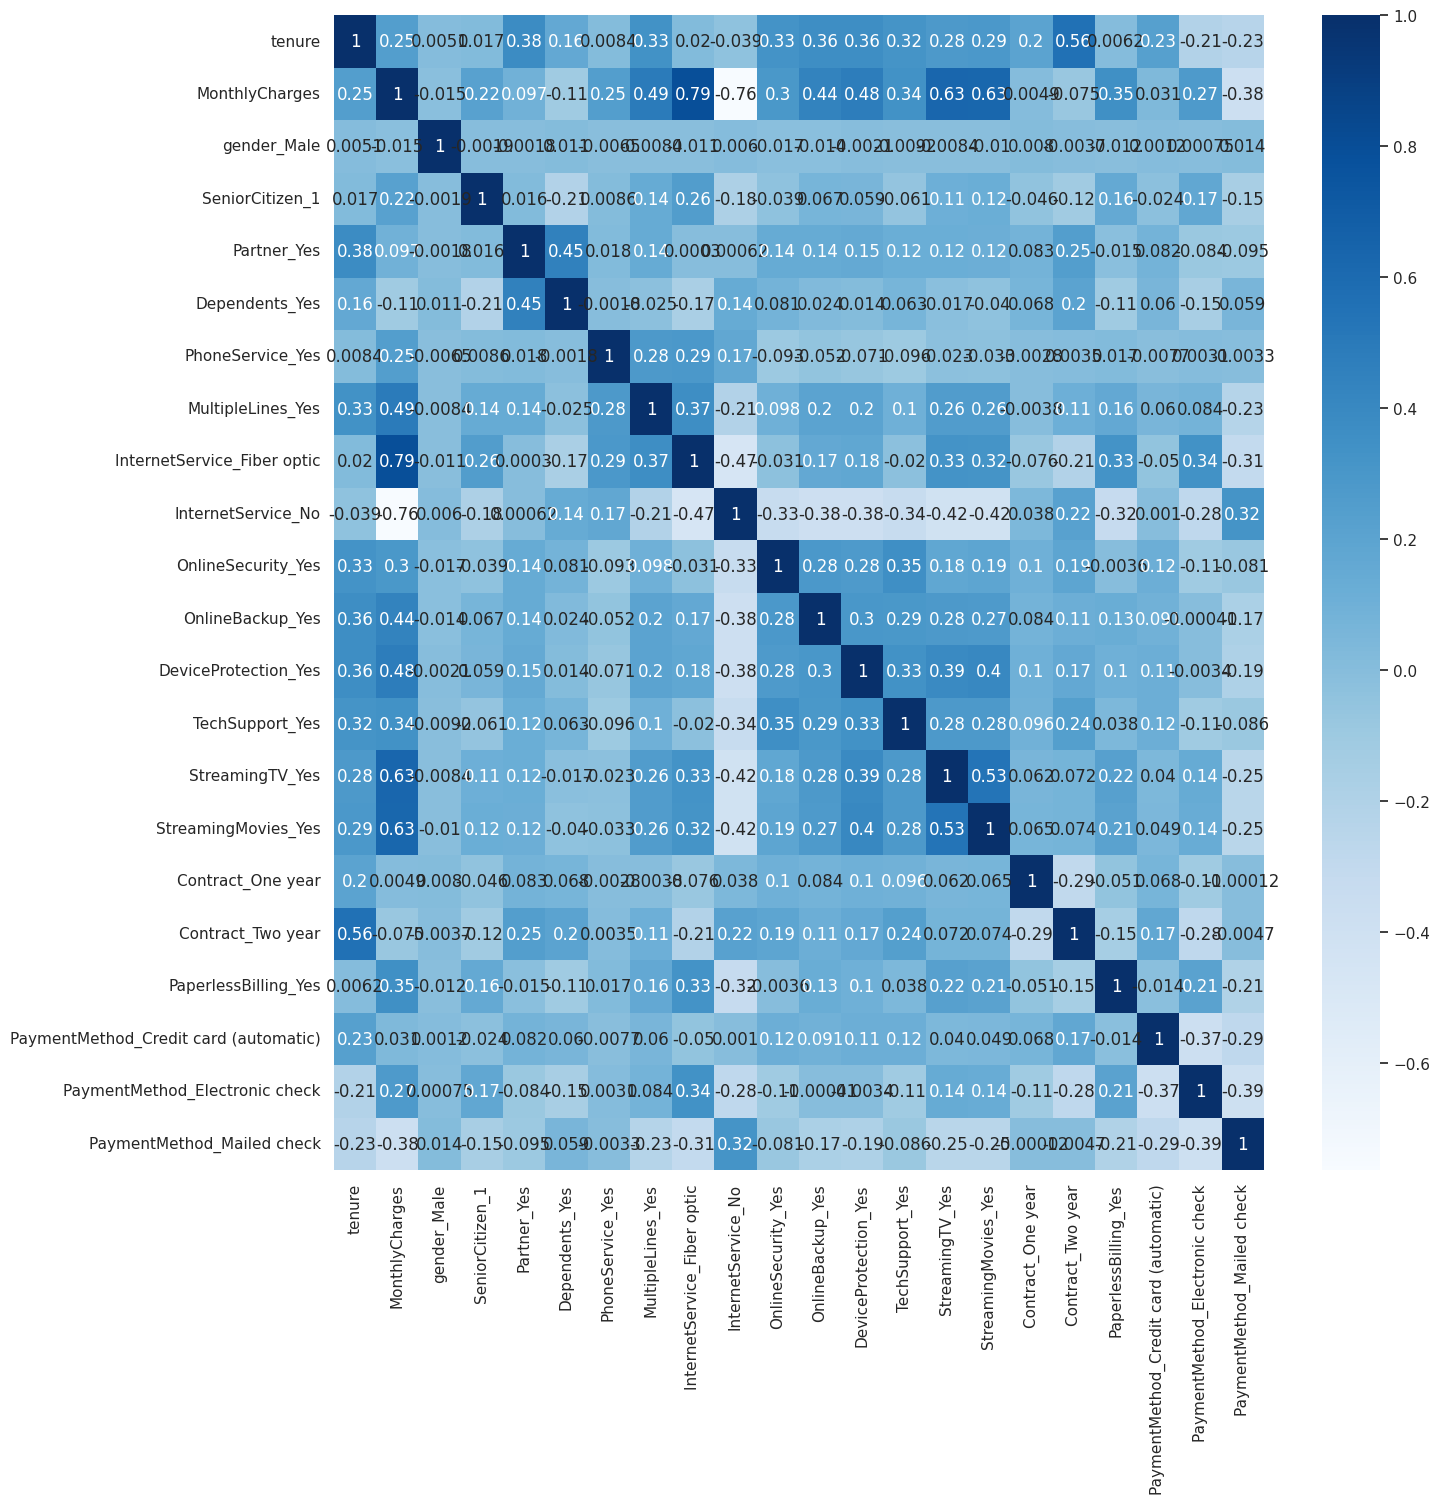

In [170]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='Blues')

Aquí vemos una fuerte correlación entre InternetService_Fiber optic y MonthlyCharges, lo cual es obvio, ya que las personas que tienen fibra óptica tendrían cargos mensuales más altos que las personas que no tienen fibra óptica.

Se observa una fuerte correlación negativa entre InternetService_No y MonthlyCharges por la misma razon.

También se observa una fuerte correlación positiva entre StreamingTV_Yes, StreamingMovies_Yes con MonthlyCharges.

<Axes: xlabel='Yes', ylabel='count'>

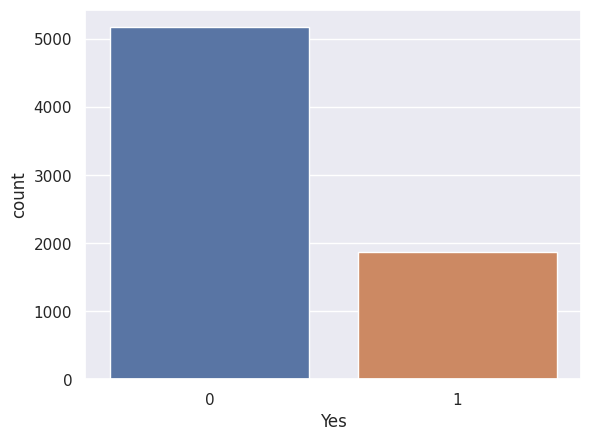

In [171]:
#Verificamos que tan desbalanceado esta la data
y=pd.get_dummies(y,drop_first=True)
sns.countplot(data=y,x="Yes")

Observamos un conjunto de datos altamente desequilibrado. Intentaremos balancearlo con Oversampling

<Axes: xlabel='Yes', ylabel='count'>

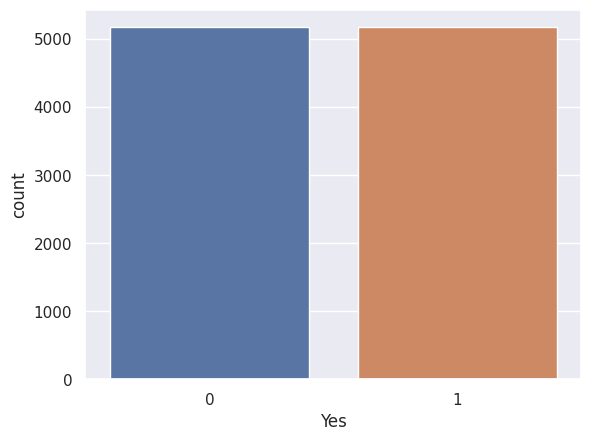

In [172]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

sns.countplot(data=y_over,x="Yes")

In [173]:
y_over=y_over["Yes"] #Seleccionamos los valores que necesitamos

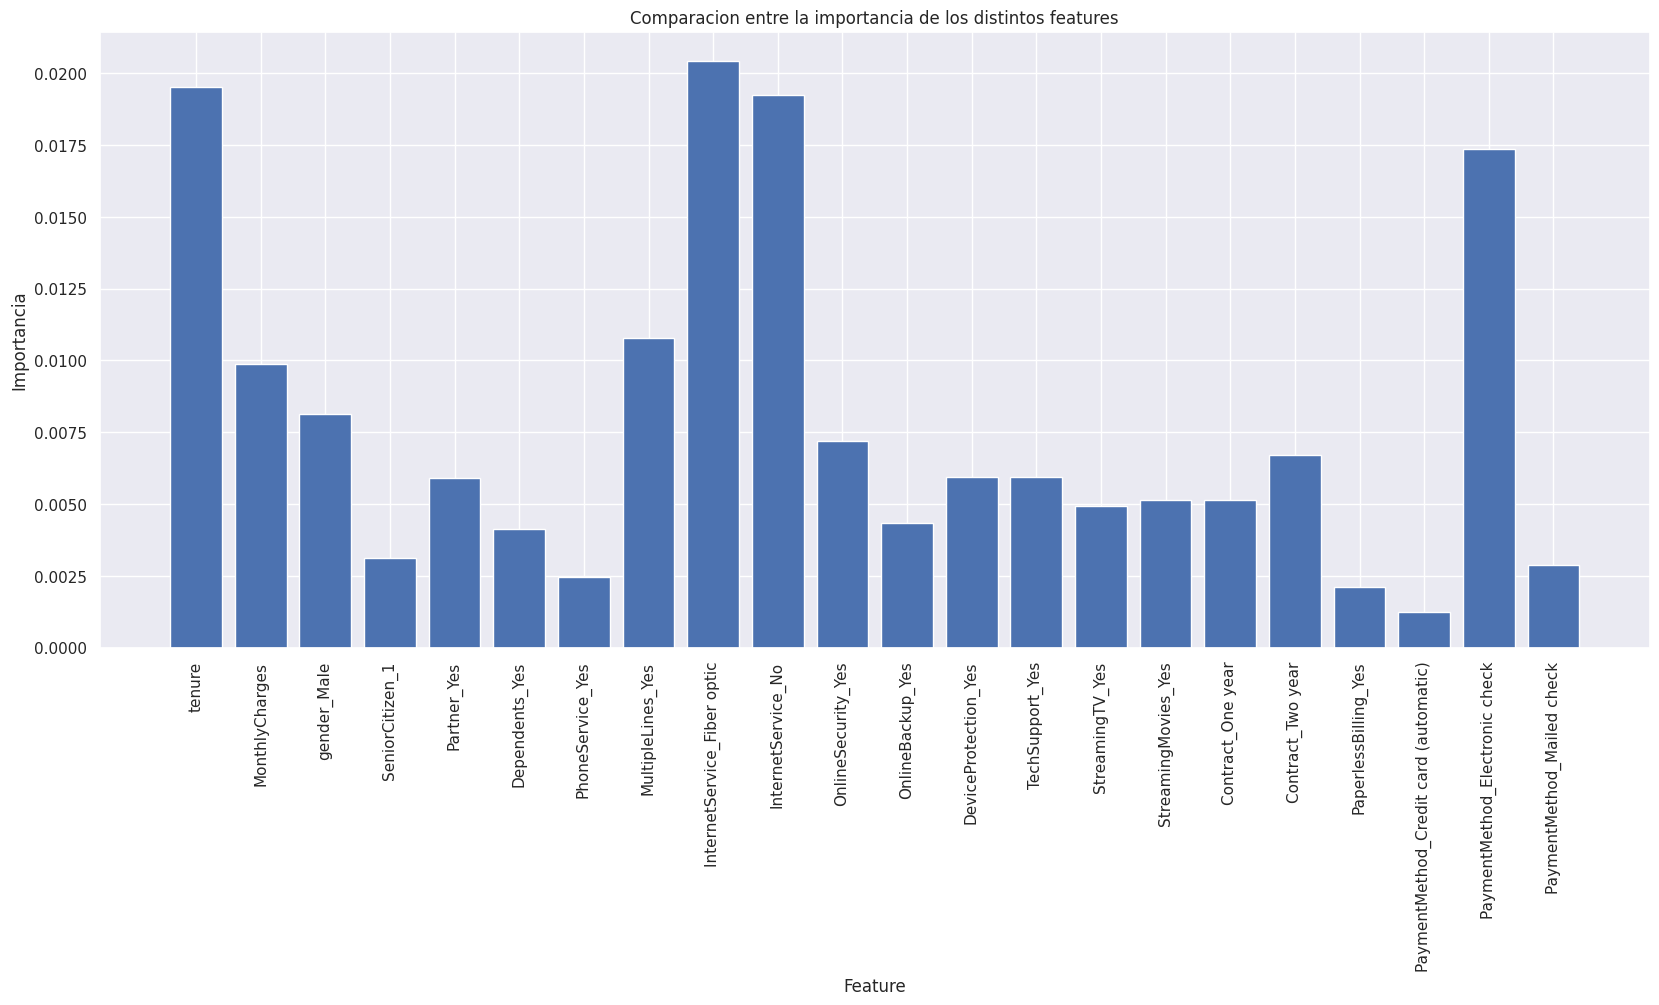

In [174]:
from sklearn.ensemble import ExtraTreesClassifier
sns.set()
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2,random_state=42)
plt.figure(figsize=(20,8))

extra_tree_forest.fit(X_over, y_over)

feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.title('Comparacion entre la importancia de los distintos features')
plt.show()

Features más importantes
*  MonthlyCharges
*  MultipleLines_Yes
*  InternetService_Fiber optic
*  InternetService_No
*  PaymentMethod_Electronic check

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,random_state=42)

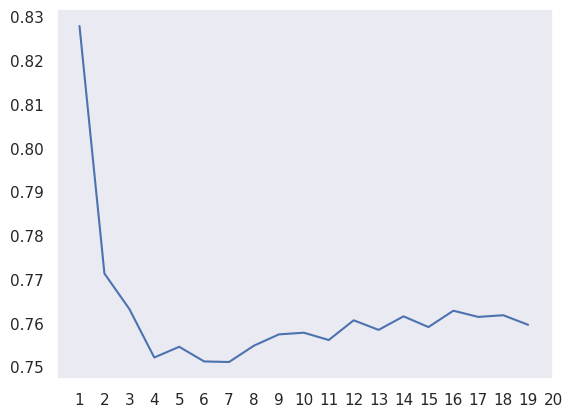

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

In [177]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1298
           1       0.82      0.93      0.87      1289

    accuracy                           0.86      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.86      0.86      2587



In [178]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1298
           1       0.95      0.89      0.92      1289

    accuracy                           0.92      2587
   macro avg       0.92      0.92      0.92      2587
weighted avg       0.92      0.92      0.92      2587



In [179]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1298
           1       0.77      0.80      0.78      1289

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



In [180]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
print(classification_report(y_test,y_pred_rcv))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1298
           1       0.86      0.94      0.90      1289

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587



In [181]:
rcv.best_params_

{'n_estimators': 200}

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1298
           1       0.80      0.90      0.85      1289

    accuracy                           0.84      2587
   macro avg       0.85      0.84      0.84      2587
weighted avg       0.85      0.84      0.84      2587



#CONCLUSIONES FINALES

Luego de este enfoque (Mejorar el Recall), podemos determinar que el mejor modelo es el Random Forest Classifier, con un Recall de 95% para la predicción acertada de los pueden abandonar y un resultado de 84% para los que no.

